In [1]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('Data/housing_data.csv')

In [2]:
# Display the first few rows of the DataFrame
df.head()

# Display the data types of each column
df.dtypes

price               float64
area                float64
bedrooms            float64
bathrooms           float64
stories             float64
mainroad             object
guestroom            object
basement             object
hotwaterheating      object
airconditioning        bool
parking               int64
prefarea               bool
furnishingstatus     object
dtype: object

In [3]:
# Get summary statistics for numerical features
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,9.910000e+02,988.000000,990.000000,985.000000,983.000000,1003.000000
mean,1.105174e+07,8957.272267,3.978788,2.608122,2.423194,1.448654
std,1.742147e+06,32301.033484,0.816014,4.030213,1.114591,1.214560
min,-1.120000e+02,-998877.000000,3.000000,1.000000,1.000000,-12.000000
25%,9.709294e+06,6776.250000,3.000000,2.000000,1.000000,0.000000
50%,1.106197e+07,10077.500000,4.000000,2.000000,2.000000,1.000000
75%,1.243362e+07,13006.250000,5.000000,4.000000,3.000000,2.000000
max,1.399908e+07,16196.000000,5.000000,124.000000,4.000000,3.000000


In [4]:
# Check for missing values in each column
df.isnull().sum()

price               12
area                15
bedrooms            13
bathrooms           18
stories             20
mainroad             0
guestroom            0
basement            47
hotwaterheating      0
airconditioning      0
parking              0
prefarea             0
furnishingstatus     0
dtype: int64

In [5]:
# Handling Missing Values
# Replace missing values with the median for numerical columns
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_columns:
    df[col].fillna(df[col].median(), inplace=True)

# Replace missing 'basement' values with the mode
df['basement'].fillna(df['basement'].mode()[0], inplace=True)

# Handling Outliers in 'price' and 'area'
# Any other numerical columns should be inspected for outliers
for col in ['price', 'area']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)

In [6]:
# Data Transformation
# Logarithmic transformation of 'area' to reduce skewness
import numpy as np

df['area_log'] = np.log(df['area'] + 1) # Adding 1 to avoid log(0) which is undefined

/Users/yug/anaconda3/envs/dev/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


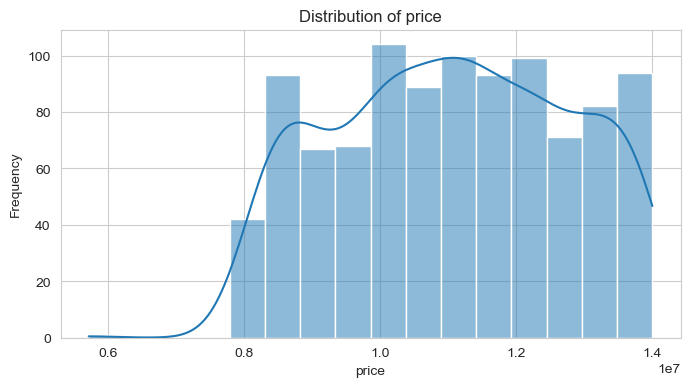

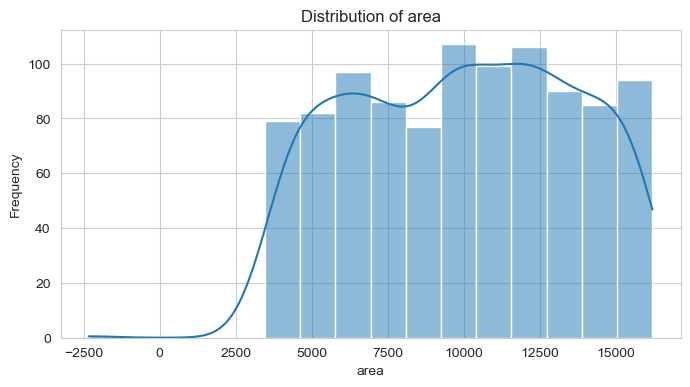

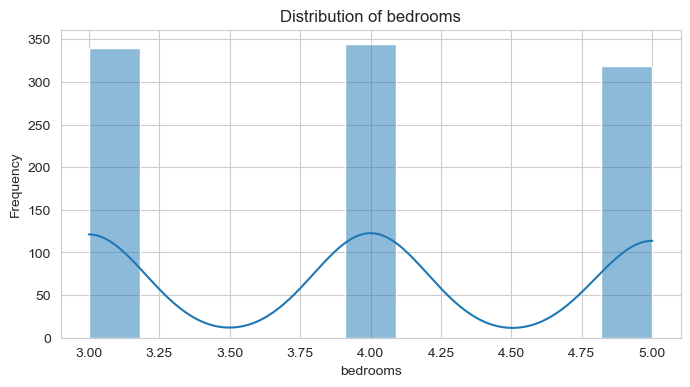

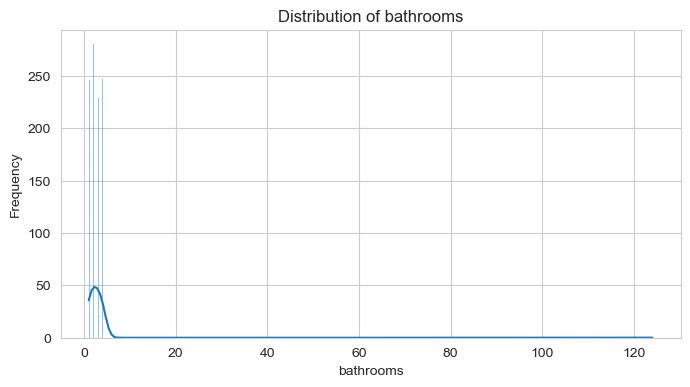

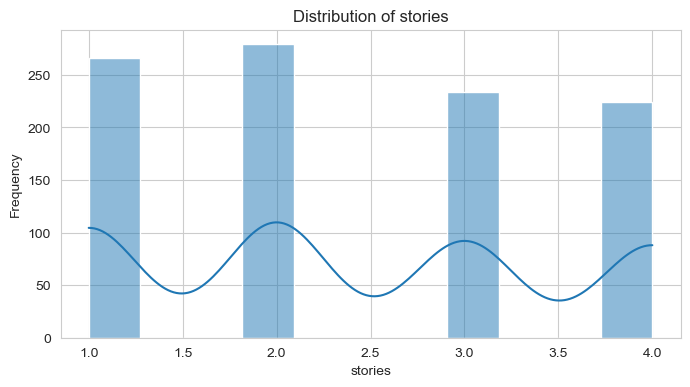

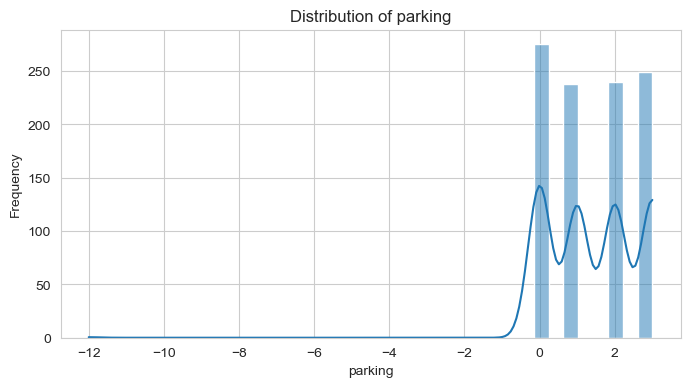

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histograms for numerical features
numerical_columns = ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking']
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

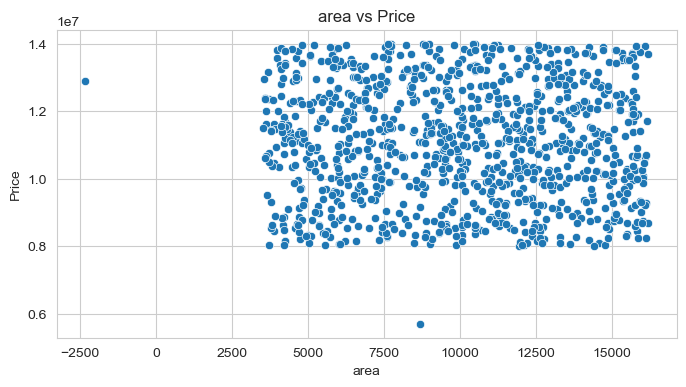

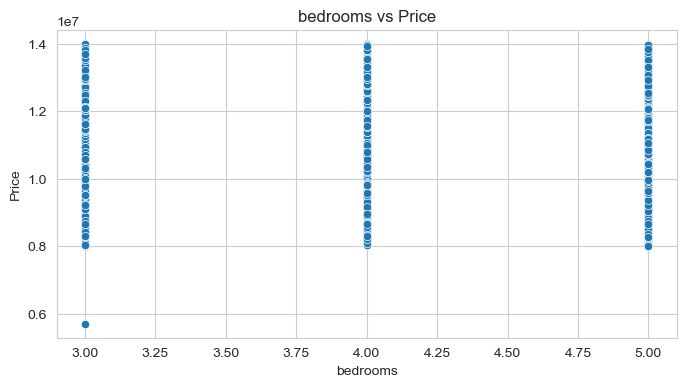

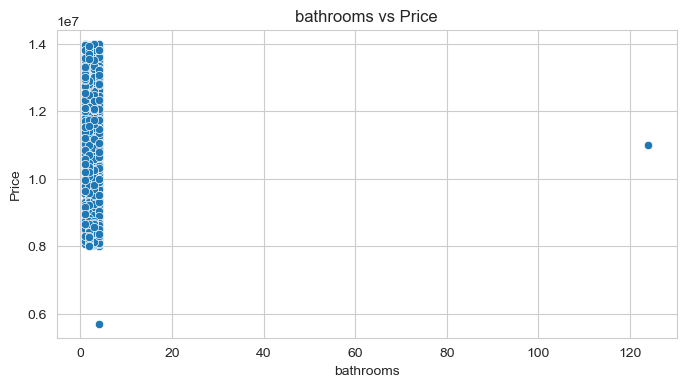

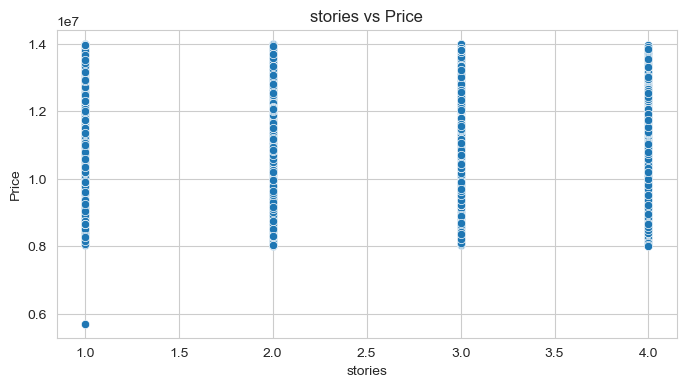

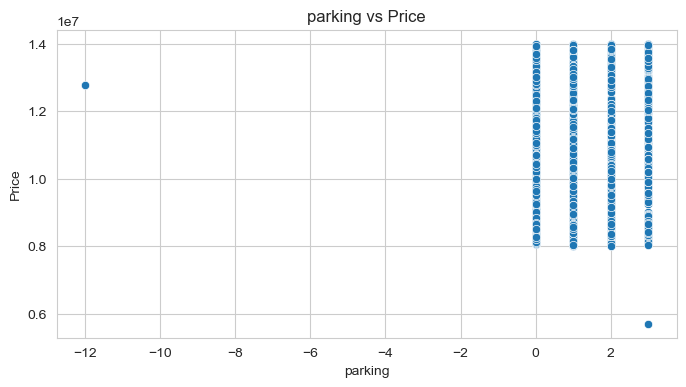

In [8]:
# Scatter plots for numerical features against the target variable 'price'
for col in numerical_columns[1:]:  # Exclude 'price'
    plt.figure(figsize=(8, 4))
    sns.scatterplot(data=df, x=col, y='price')
    plt.title(f'{col} vs Price')
    plt.xlabel(col)
    plt.ylabel('Price')
    plt.show()

semi-furnished    341
furnished         341
unfurnished       320
ERROR               1
Name: furnishingstatus, dtype: int64


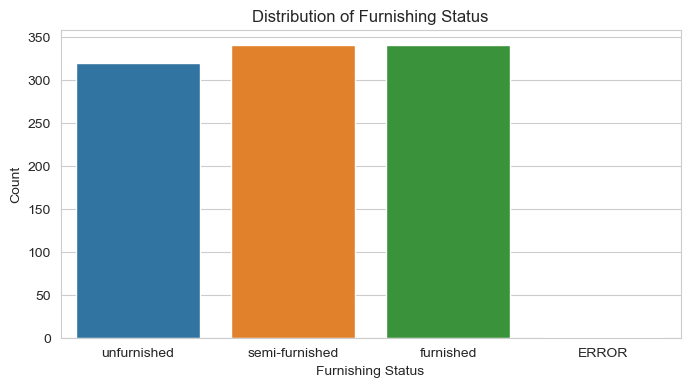

In [9]:
# Convert boolean columns to a consistent format
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
for col in boolean_columns:
    df[col] = df[col].astype(bool)

# Check the distribution of categorical variables
print(df['furnishingstatus'].value_counts())

# Bar plot for 'furnishingstatus'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='furnishingstatus')
plt.title('Distribution of Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Count')
plt.show()

In [10]:
# Categorical Variables Encoding
# One-hot encoding for 'furnishingstatus' column
df = pd.get_dummies(df, columns=['furnishingstatus'], drop_first=True)

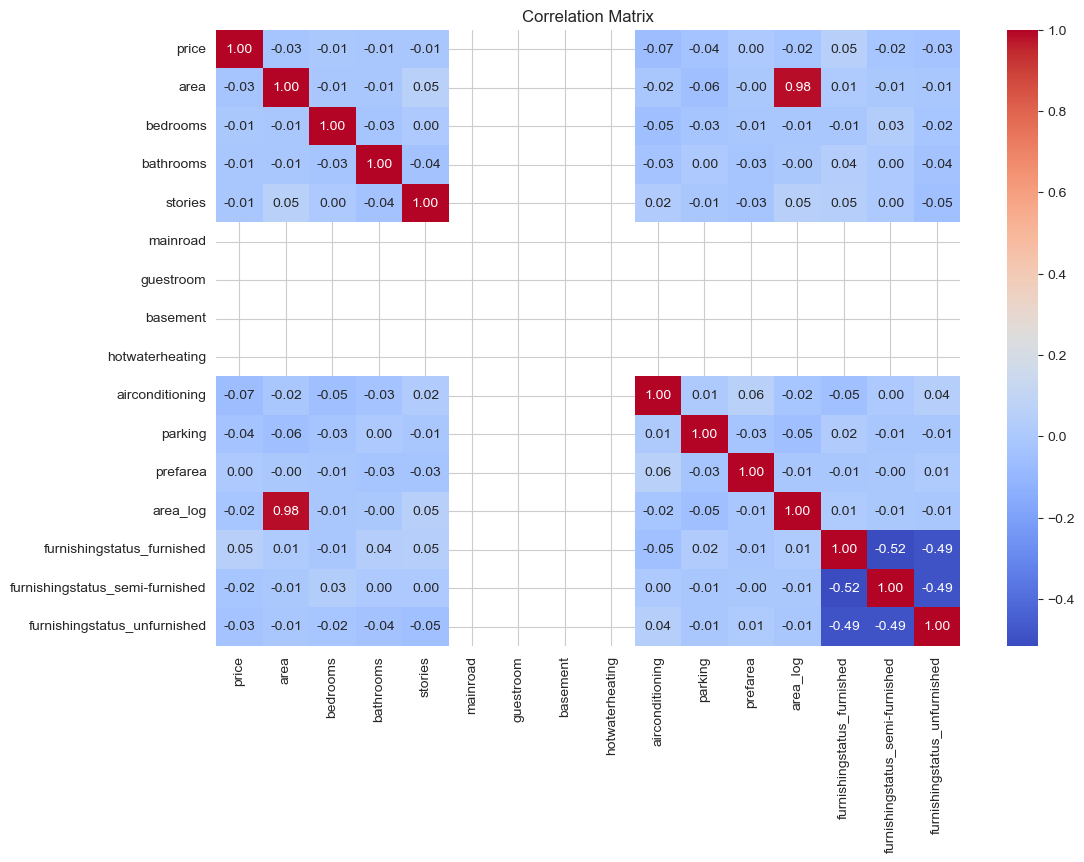

In [11]:
# Correlation Analysis
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [12]:
from sklearn.preprocessing import StandardScaler

cleaned_df = pd.read_csv('clean_housing_data.csv')

# Assuming 'price' and 'area' do not contain zeros or negative values in the original data
cleaned_df['price'] = cleaned_df['price'].clip(lower=0.01)
cleaned_df['area'] = cleaned_df['area'].clip(lower=0.01)

# Reapply the log transformation
cleaned_df['price_log'] = np.log(cleaned_df['price'])
cleaned_df['area_log'] = np.log(cleaned_df['area'])

# Check again for any NaN values after re-cleaning
new_nan_count = cleaned_df.isnull().sum()

# Save the re-cleaned DataFrame to a new CSV file
cleaned_df.to_csv('Data/re_cleaned_housing_data.csv', index=False)

# Output the count of NaN values after re-cleaning
new_nan_count

price                              0
area                               0
bedrooms                           0
bathrooms                          0
stories                            0
mainroad                           0
guestroom                          0
basement                           0
hotwaterheating                    0
airconditioning                    0
parking                            0
prefarea                           0
area_log                           0
furnishingstatus_furnished         0
furnishingstatus_semi-furnished    0
furnishingstatus_unfurnished       0
price_log                          0
dtype: int64